In [1]:
import os
from lib.train_AI_lib import *
import cv2
import numpy as np

In [2]:
os.chdir('..')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/APS360/APS360-2020Summer-Project


In [3]:
def createMask(bboxes, imgRes=(1024, 2014)):
    globalMask = np.zeros(imgRes, dtype=bool)
    for bbox in bboxes:
        oneMask = np.zeros(imgRes, dtype=bool)
        bbox = [int(number) for number in bbox]
        # Don't ask me why this flip works, numpy and cv2 take images in differently and it's a pain to try and figure out the transformations    
        oneMask[bbox[0]:(bbox[0]+bbox[2]), imgRes[1]-(bbox[1]+bbox[3]):imgRes[1]-bbox[1]] = np.ones((bbox[2], bbox[3]), dtype=bool)
        globalMask = np.bitwise_or(globalMask, oneMask)
    globalMask = np.rot90(globalMask, 1)
    return(globalMask)

def genBBoxImages(dictPath='saved/splitData', inPath='data/working-wheat-data/train', oPath='saved/bboxMasked'):
    try: os.makedirs(oPath)  # Make the requested oPath
    except FileExistsError: None
    except: print("error creating folder {}".format(oPath)); return(0)
    else: None
    
    trainData = torch.load(dictPath+"/trainData")
    valData   = torch.load(dictPath+"/valData"  )
    testData  = torch.load(dictPath+"/testData" )
    trainData.update(valData); trainData.update(testData)
    imgPath   = inPath+'/'
    keyList   = list(trainData.keys())

    for i, imgName in enumerate(keyList):
        img  = cv2.imread(imgPath+imgName)
        bbox = trainData[imgName]
        mask = createMask(bbox, np.shape(img)[:-1])
        img[:, :, 0] = np.multiply(img[:, :, 0], mask)
        img[:, :, 1] = np.multiply(img[:, :, 1], mask)
        img[:, :, 2] = np.multiply(img[:, :, 2], mask)

        if i%100==0: print("Converted {:.2f}%".format(100*i/len(keyList)))
        cv2.imwrite(oPath+'/'+imgName, img)

In [4]:
#genBBoxImages()

In [5]:
class autEncA(nn.Module):
    def __init__(self, name):
        super(autEncA, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 5, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(5, 10, 3, stride=2, padding=1),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(10, 5, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(5, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
calcNoParam(autEncA(''))

1193


In [6]:
class autEncB(nn.Module):
    def __init__(self, name):
        super(autEncB, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 5, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(5, 10, 4, stride=2, padding=1),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(10, 5, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(5, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
calcNoParam(autEncB(''))

2103


In [10]:
class autEncC(nn.Module):
    def __init__(self, name):
        super(autEncC, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 5, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(5, 7, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(7, 10, 4, stride=2, padding=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(10, 7, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(7, 5, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(5, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
calcNoParam(autEncC(''))

3877


In [14]:
class autEncD(nn.Module):  # Ratio of Input Size to code size = 12.8
    def __init__(self, name):
        super(autEncD, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(6, 10, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(10, 15, 4, stride=2, padding=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(15, 10, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(10, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
calcNoParam(autEncD(''))

7346


In [17]:
class autEncE(nn.Module):  # Ratio of inputsize to code size 3.15
    def __init__(self, name):
        super(autEncE, self).__init__()
        self.name = name
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(3, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(6, 10, 4, stride=2, padding=1),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(10, 6, 4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(6, 3, 4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
calcNoParam(autEncE(''))

2521


Epoch 0 | Time Taken: 227.51s | Train rootMSE: 0.3786721811, Train loss: 0.1433926207 | Validation rootMSE: 0.2632476078, Validation loss: 0.0692993030
Epoch 1 | Time Taken: 190.88s | Train rootMSE: 0.2443570169, Train loss: 0.0597103517 | Validation rootMSE: 0.2409011702, Validation loss: 0.0580333738
Epoch 2 | Time Taken: 182.75s | Train rootMSE: 0.2396455604, Train loss: 0.0574299946 | Validation rootMSE: 0.2401138691, Validation loss: 0.0576546701
Epoch 3 | Time Taken: 181.94s | Train rootMSE: 0.2393302915, Train loss: 0.0572789884 | Validation rootMSE: 0.2412632295, Validation loss: 0.0582079459
Epoch 4 | Time Taken: 180.69s | Train rootMSE: 0.2392541812, Train loss: 0.0572425632 | Validation rootMSE: 0.2405439930, Validation loss: 0.0578614126
Epoch 5 | Time Taken: 181.65s | Train rootMSE: 0.2390959141, Train loss: 0.0571668561 | Validation rootMSE: 0.2410530714, Validation loss: 0.0581065832
Epoch 6 | Time Taken: 182.27s | Train rootMSE: 0.2391217414, Train loss: 0.0571792072 | 

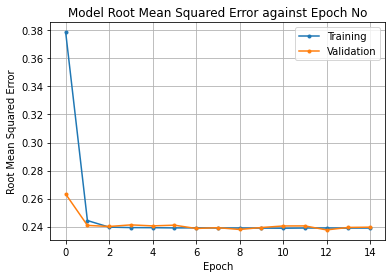

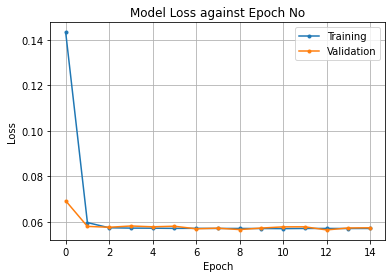

In [7]:
batchsize=64; epoch=15; lr=0.001
net = autEncB('autEncB'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

Epoch 0 | Time Taken: 184.04s | Train rootMSE: 0.3842616959, Train loss: 0.1476570509 | Validation rootMSE: 0.2425376082, Validation loss: 0.0588244914
Epoch 1 | Time Taken: 182.63s | Train rootMSE: 0.2395962909, Train loss: 0.0574063826 | Validation rootMSE: 0.2402418854, Validation loss: 0.0577161635
Epoch 2 | Time Taken: 181.51s | Train rootMSE: 0.2391600956, Train loss: 0.0571975513 | Validation rootMSE: 0.2398160054, Validation loss: 0.0575117165
Epoch 3 | Time Taken: 182.63s | Train rootMSE: 0.2390866135, Train loss: 0.0571624087 | Validation rootMSE: 0.2410938465, Validation loss: 0.0581262428
Epoch 4 | Time Taken: 182.11s | Train rootMSE: 0.2390842991, Train loss: 0.0571613021 | Validation rootMSE: 0.2403855598, Validation loss: 0.0577852173
Epoch 5 | Time Taken: 182.41s | Train rootMSE: 0.2389488864, Train loss: 0.0570965703 | Validation rootMSE: 0.2409271032, Validation loss: 0.0580458691
Epoch 6 | Time Taken: 181.42s | Train rootMSE: 0.2389990225, Train loss: 0.0571205328 | 

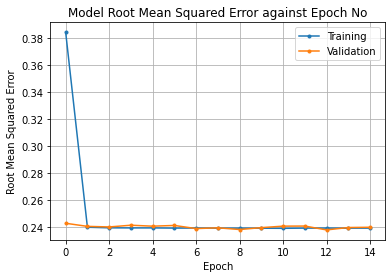

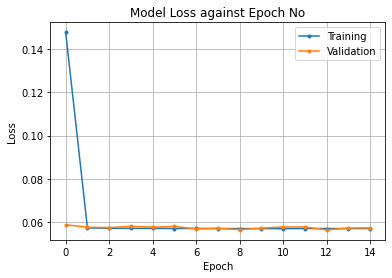

In [11]:
batchsize=64; epoch=15; lr=0.001
net = autEncC('autEncC'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

Epoch 0 | Time Taken: 186.95s | Train rootMSE: 0.3685348159, Train loss: 0.1358179105 | Validation rootMSE: 0.2409865781, Validation loss: 0.0580745308
Epoch 1 | Time Taken: 184.71s | Train rootMSE: 0.2394053675, Train loss: 0.0573149300 | Validation rootMSE: 0.2402035453, Validation loss: 0.0576977432
Epoch 2 | Time Taken: 184.72s | Train rootMSE: 0.2391133686, Train loss: 0.0571752030 | Validation rootMSE: 0.2397669662, Validation loss: 0.0574881981
Epoch 3 | Time Taken: 183.86s | Train rootMSE: 0.2390333282, Train loss: 0.0571369320 | Validation rootMSE: 0.2410372651, Validation loss: 0.0580989632
Epoch 4 | Time Taken: 184.73s | Train rootMSE: 0.2390164652, Train loss: 0.0571288706 | Validation rootMSE: 0.2403159856, Validation loss: 0.0577517729
Epoch 5 | Time Taken: 184.56s | Train rootMSE: 0.2388838410, Train loss: 0.0570654895 | Validation rootMSE: 0.2408690443, Validation loss: 0.0580178965
Epoch 6 | Time Taken: 189.16s | Train rootMSE: 0.2389445553, Train loss: 0.0570945005 | 

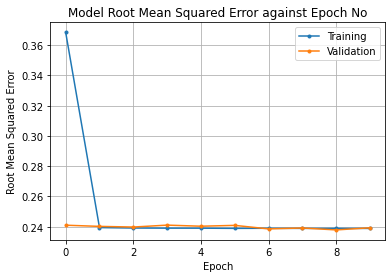

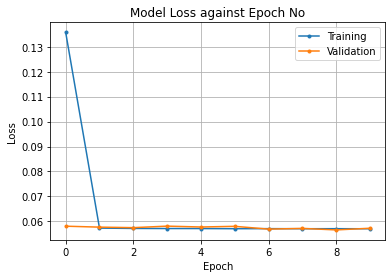

In [15]:
batchsize=64; epoch=10; lr=0.001
net = autEncD('autEncD'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

Epoch 0 | Time Taken: 184.65s | Train rootMSE: 0.3863405005, Train loss: 0.1492589823 | Validation rootMSE: 0.2588858753, Validation loss: 0.0670218964
Epoch 1 | Time Taken: 186.23s | Train rootMSE: 0.2426003099, Train loss: 0.0588549104 | Validation rootMSE: 0.2405315231, Validation loss: 0.0578554136
Epoch 2 | Time Taken: 186.32s | Train rootMSE: 0.2393951304, Train loss: 0.0573100285 | Validation rootMSE: 0.2399764770, Validation loss: 0.0575887095
Epoch 3 | Time Taken: 185.38s | Train rootMSE: 0.2392306410, Train loss: 0.0572312996 | Validation rootMSE: 0.2412033015, Validation loss: 0.0581790327
Epoch 4 | Time Taken: 186.94s | Train rootMSE: 0.2392119977, Train loss: 0.0572223798 | Validation rootMSE: 0.2405156915, Validation loss: 0.0578477979
Epoch 5 | Time Taken: 186.41s | Train rootMSE: 0.2390809514, Train loss: 0.0571597013 | Validation rootMSE: 0.2410468858, Validation loss: 0.0581036011
Epoch 6 | Time Taken: 187.96s | Train rootMSE: 0.2391207992, Train loss: 0.0571787566 | 

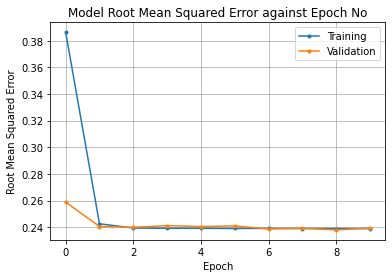

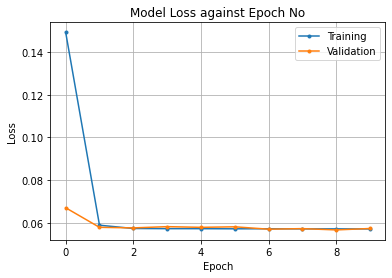

In [18]:
batchsize=64; epoch=10; lr=0.001
net = autEncE('autEncE'); net.cuda()
trainLoader, valLoader, testLoader = loadData(batchsize, tempPath='temp/auto', mode='auto', preCalc=0, altArg={'compPath':'saved/bboxMasked'})
_ = trainNet(net, [trainLoader, valLoader], batchsize, epoch, lr, trainType='AutoEnc')

Looking at the results of NetD and NetE, there dosent seem to be a signficant difference
Both reached lowest rMSE of around 0.238. However, there is merit to the thought that when these networks are put through semi-supervised environments, they will perform differently
due to the difference no of core variables